<a href="https://colab.research.google.com/github/saifur033/CSE-303/blob/main/Walmart_sales_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/CSE 303/lab5/Walmart_sales.csv'
df = pd.read_csv(file_path)

# Display column names and a sample of the data
print("Columns in the dataset:", df.columns)
print("\nSample data:")
print(df.head())



Columns in the dataset: Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Sample data:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


<ipython-input-7-d4aeabff4c7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Holiday_Flag', palette='coolwarm')


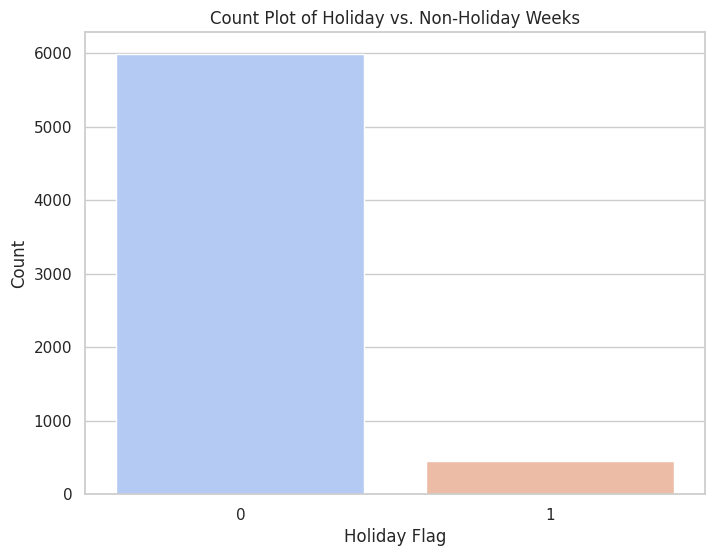

In [7]:
#Count Plot of Holiday vs. Non-Holiday Weeks:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Holiday_Flag', palette='coolwarm')
plt.title('Count Plot of Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()





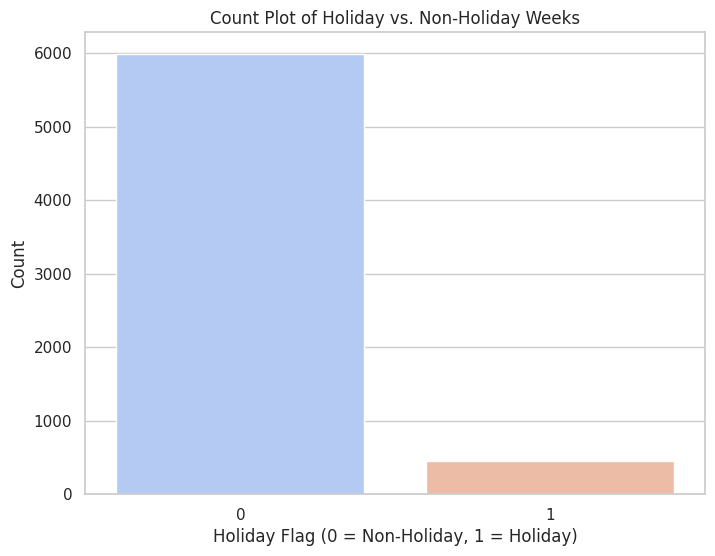

In [8]:
#Bar Plot of Total Sales by Store:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Holiday_Flag', hue='Holiday_Flag', palette='coolwarm', dodge=False, legend=False)

# Add titles and labels
plt.title('Count Plot of Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Count')

# Show the plot
plt.show()



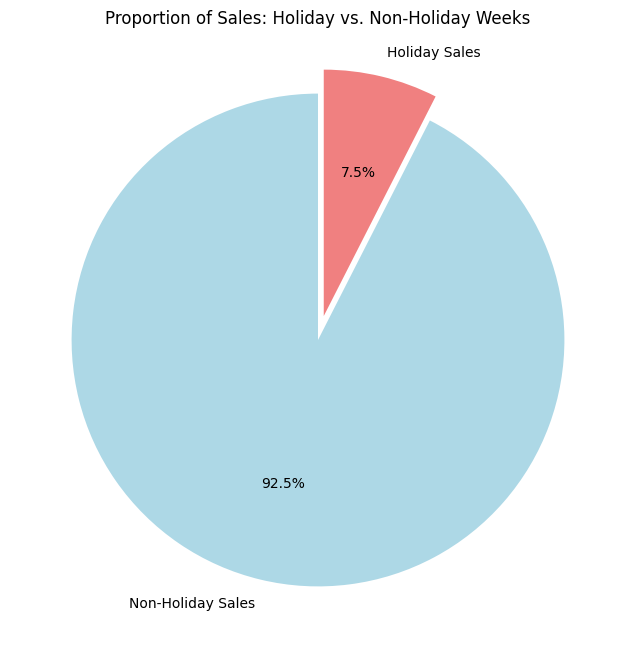

In [ ]:
#Pie Chart of Holiday vs. Non-Holiday Sales Proportion:
# Step 1: Aggregate total sales by holiday status
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()

# Step 2: Prepare data for the pie chart
labels = ['Non-Holiday Sales', 'Holiday Sales']
sales_values = holiday_sales.values
colors = ['lightblue', 'lightcoral']

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))

# Add title
plt.title('Proportion of Sales: Holiday vs. Non-Holiday Weeks')

# Show the plot
plt.show()




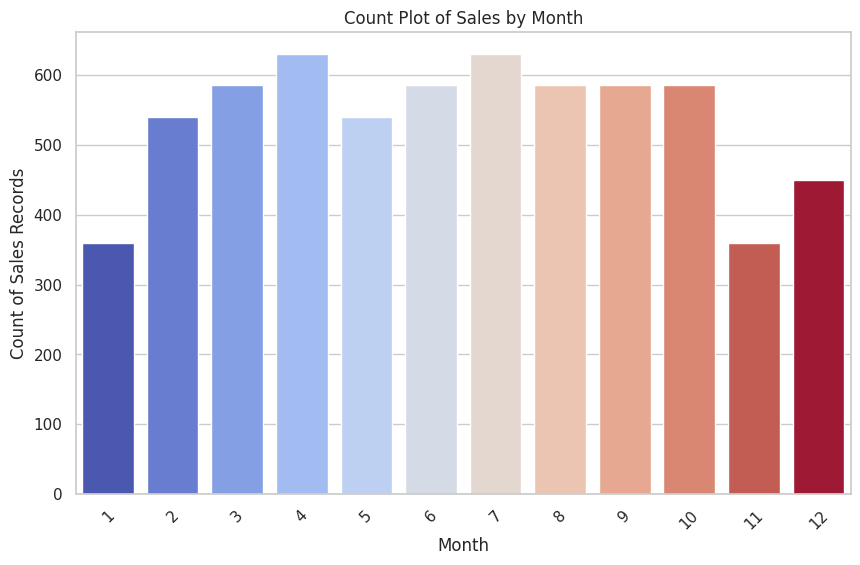

In [10]:
#Count Plot of Sales by Month:
df['Month'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.month


#  Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Month', palette='coolwarm', dodge=False, legend=False)

#: Add title and labels
plt.title('Count Plot of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Count of Sales Records')
plt.xticks(ticks=range(0, 12), labels=[
    '1', '2', '3', '4', '5', '6',
    '7', '8', '9', '10', '11', '12'], rotation=45)

# Show the plot
plt.show()



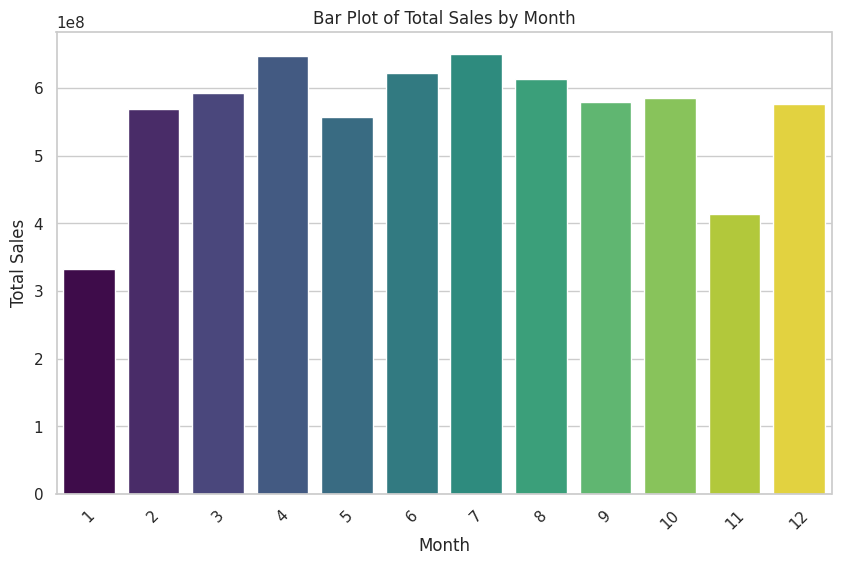

In [11]:
#Bar Plot of Total Sales by Month:

# Extract the month from the Date column
df['Month'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.month

# Aggregate total sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

#  Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Month', palette='viridis', legend=False)


#  Add title and labels
plt.title('Bar Plot of Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(0, 12), labels=[
    '1', '2', '3', '4', '5', '6',
    '7', '8', '9', '10', '11', '12'], rotation=45)

# Show the plot
plt.show()


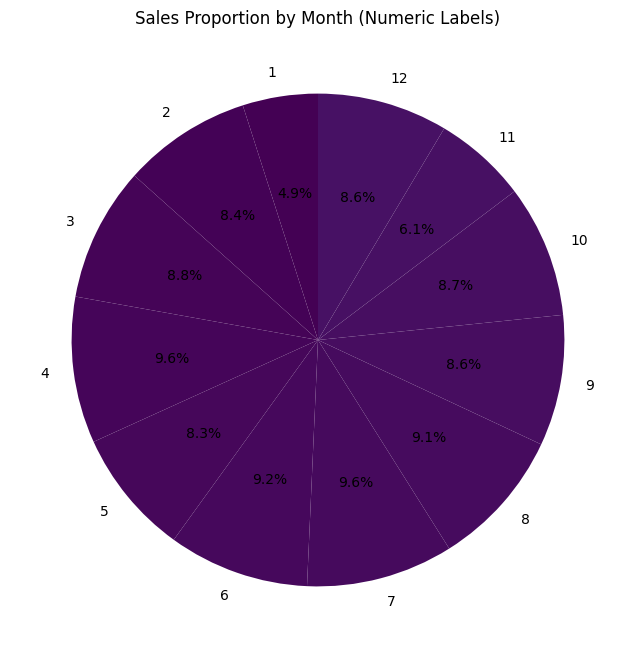

In [ ]:
#Pie Chart of Sales Proportion by Month:
import matplotlib.pyplot as plt

# Step 1: Extract the month from the Date column
df['Month'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.month

# Step 2: Aggregate total sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

# Step 3: Prepare data for the pie chart
labels = [str(i) for i in range(1, 13)]  # Numeric labels 1 to 12
sales_values = monthly_sales['Weekly_Sales'].values
colors = plt.cm.viridis(range(12))  # Generate 12 unique colors

# Step 4: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title
plt.title('Sales Proportion by Month (Numeric Labels)')

# Show the plot
plt.show()


In [ ]:
#bonus marks if you explore and do 5 exclusive pots of your own idea

**1. Heatmap of Weekly Sales Across Stores and Months**

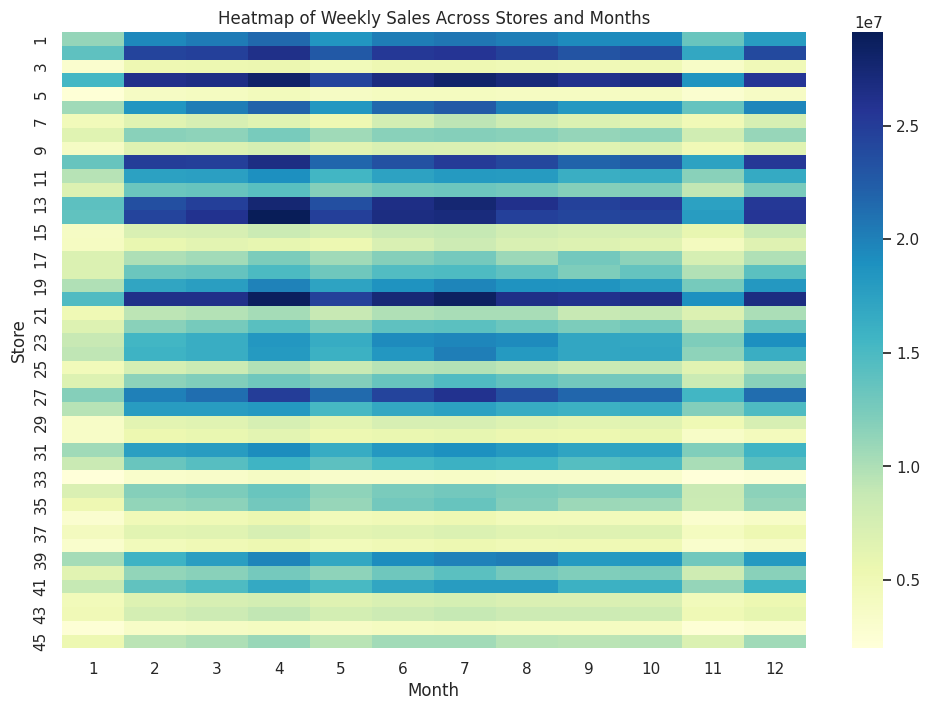

In [14]:
# Pivot table to aggregate sales by Store and Month


# Heatmap plot
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Weekly Sales Across Stores and Months')
plt.xlabel('Month')
plt.ylabel('Store')
plt.show()


**2. Line Plot of Average Weekly Sales by Montht**

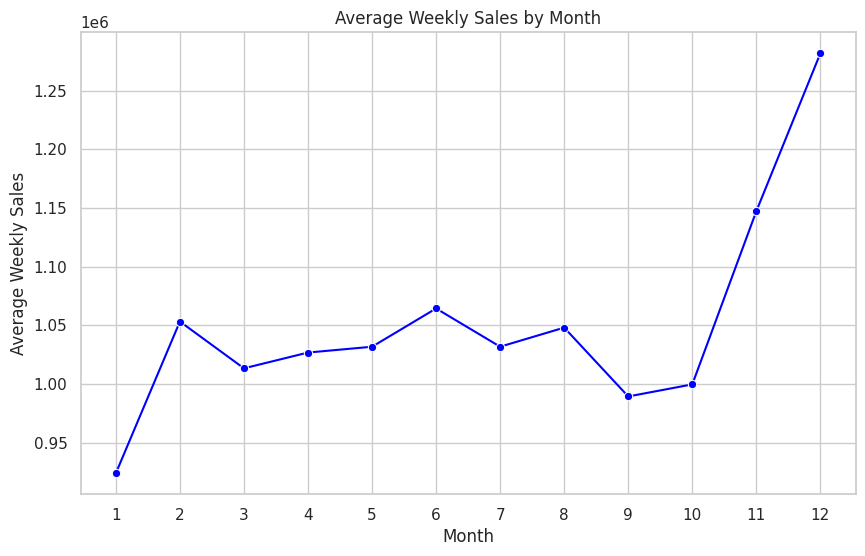

In [16]:
# Aggregate average weekly sales by month
avg_sales_by_month = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_sales_by_month, x='Month', y='Weekly_Sales', marker='o', color='blue')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


**3. Box Plot of Weekly Sales by Store**

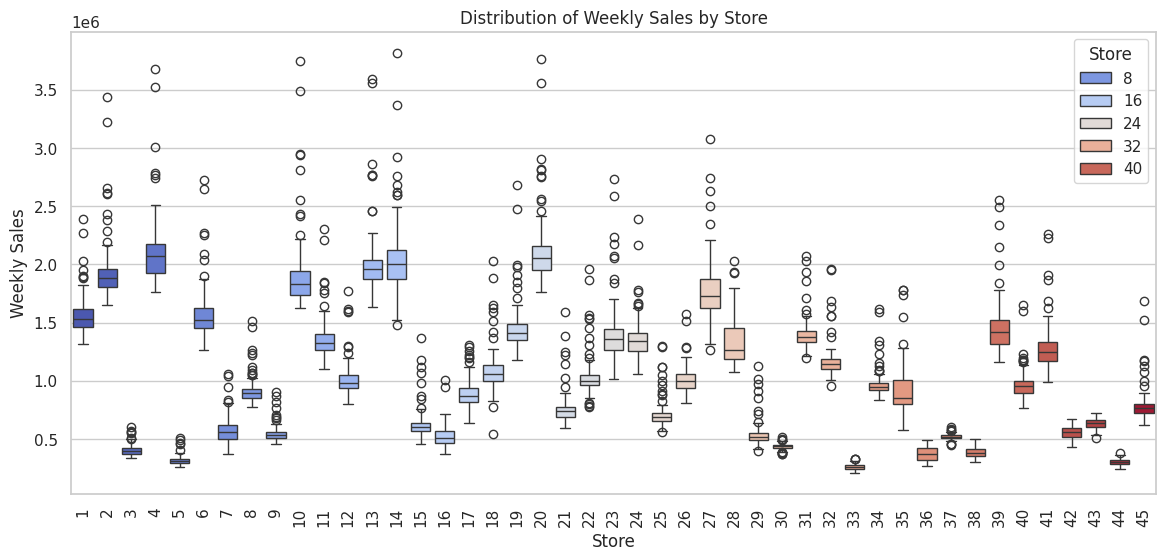

In [19]:
# Box plot of Weekly Sales by Store
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Store', y='Weekly_Sales', hue='Store', palette='coolwarm')
plt.title('Distribution of Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.show()




**4. Scatter Plot of Weekly Sales vs. Temperature**

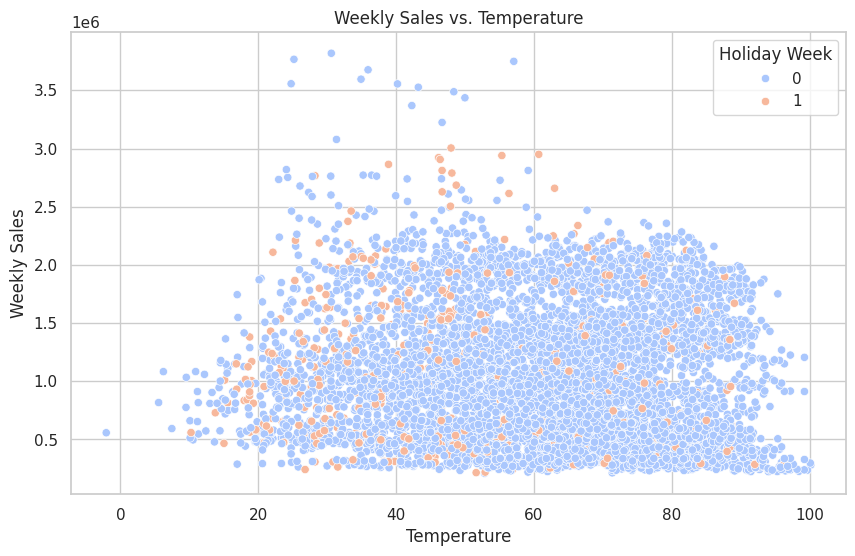

In [23]:
# Scatter plot of Weekly Sales vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag', palette='coolwarm')
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.legend(title='Holiday Week')
plt.show()
